# Base

# 1. LeetCode 312. Burst Balloons 戳气球

You are given n balloons, indexed from 0 to n - 1. Each balloon is painted with a number on it represented by an array nums. You are asked to burst all the balloons.

If you burst the ith balloon, you will get nums[i - 1] * nums[i] * nums[i + 1] coins. If i - 1 or i + 1 goes out of bounds of the array, then treat it as if there is a balloon with a 1 painted on it.

Return the maximum coins you can collect by bursting the balloons wisely.

有 n 个气球，编号为0 到 n - 1，每个气球上都标有一个数字，这些数字存在数组 nums 中。

现在要求你戳破所有的气球。戳破第 i 个气球，你可以获得 nums[i - 1] * nums[i] * nums[i + 1] 枚硬币。 这里的 i - 1 和 i + 1 代表和 i 相邻的两个气球的序号。如果 i - 1或 i + 1 超出了数组的边界，那么就当它是一个数字为 1 的气球。

求所能获得硬币的最大数量。


Example 1:

```
Input: nums = [3,1,5,8]
Output: 167
Explanation:
nums = [3,1,5,8] --> [3,5,8] --> [3,8] --> [8] --> []
coins =  3*1*5    +   3*5*8   +  1*3*8  + 1*8*1 = 167
```


Example 2:

```
Input: nums = [1,5]
Output: 10
```


Constraints:

- n == nums.length

- 1 <= n <= 300

- 0 <= nums[i] <= 100

In [1]:
from typing import List
def maxCoins(self, nums: List[int]) -> int:
        if len(nums) == 0:
            return 0
        if len(nums) < 2:
            return nums[0]
        nums = [1] + nums + [1]
        dp = [[0] * len(nums) for _ in range(len(nums))]
        for i in range(len(nums) - 1, -1, -1):
            for j in range(i + 2, len(nums)):
                for k in range(i + 1, j):
                    dp[i][j] = max(dp[i][j], dp[i][k] + dp[k][j] + nums[i] * nums[k] * nums[j])
        # print(dp)
        return dp[0][-1]

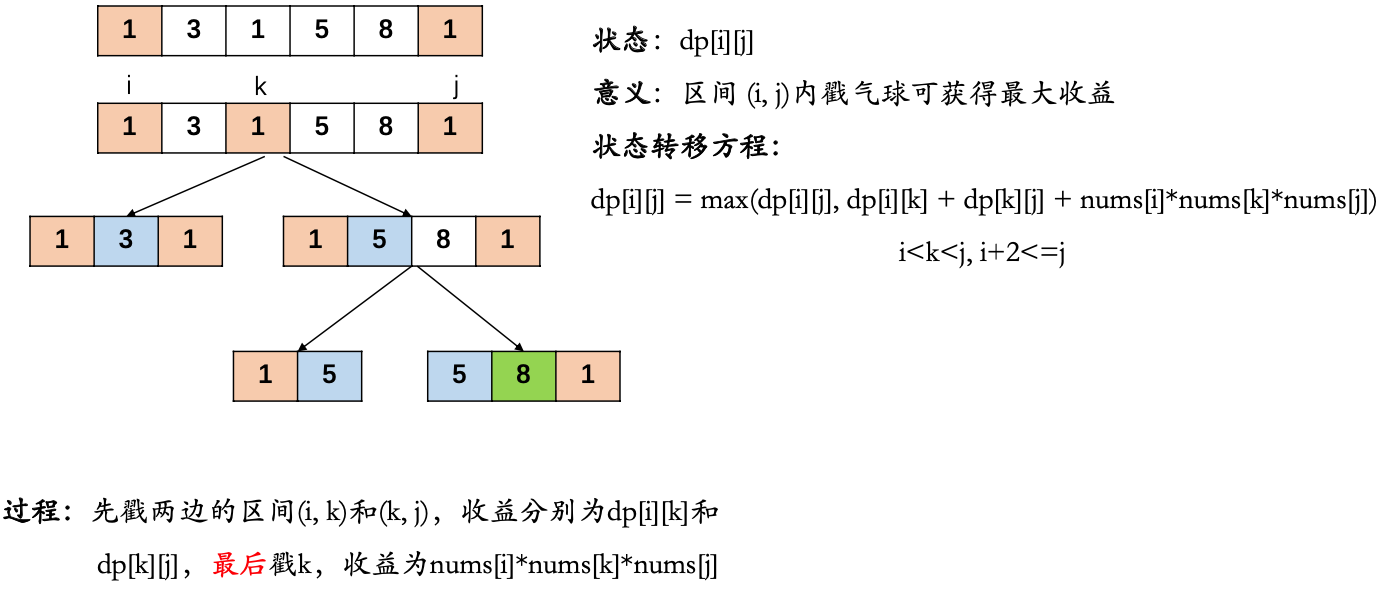

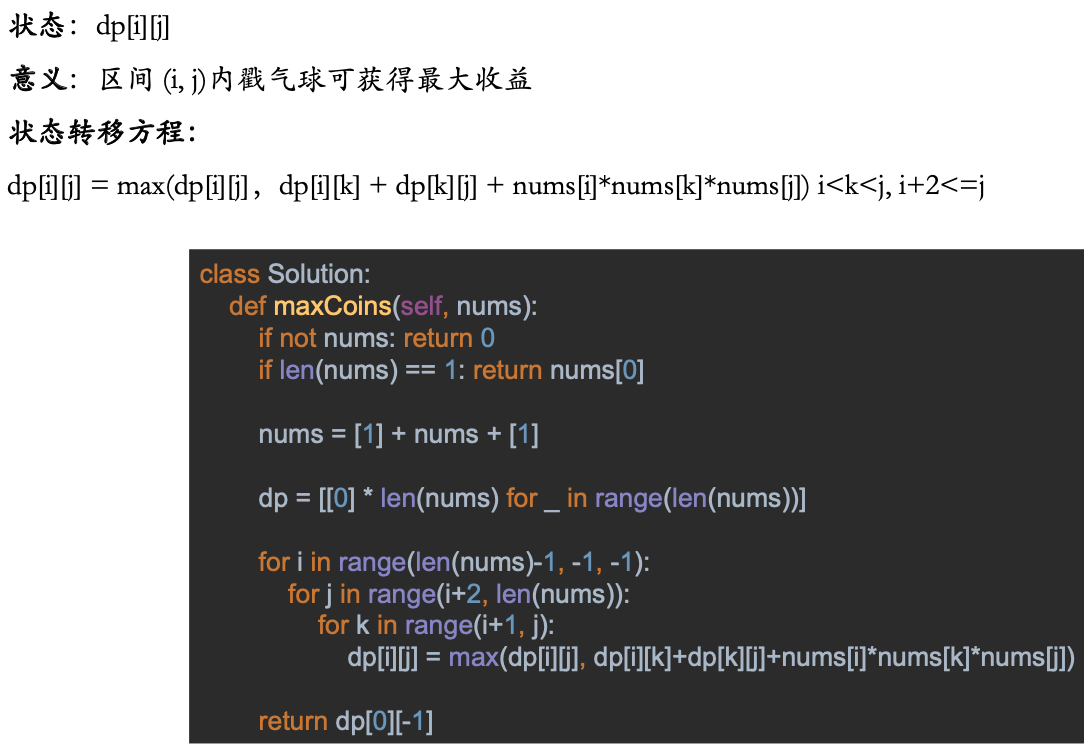

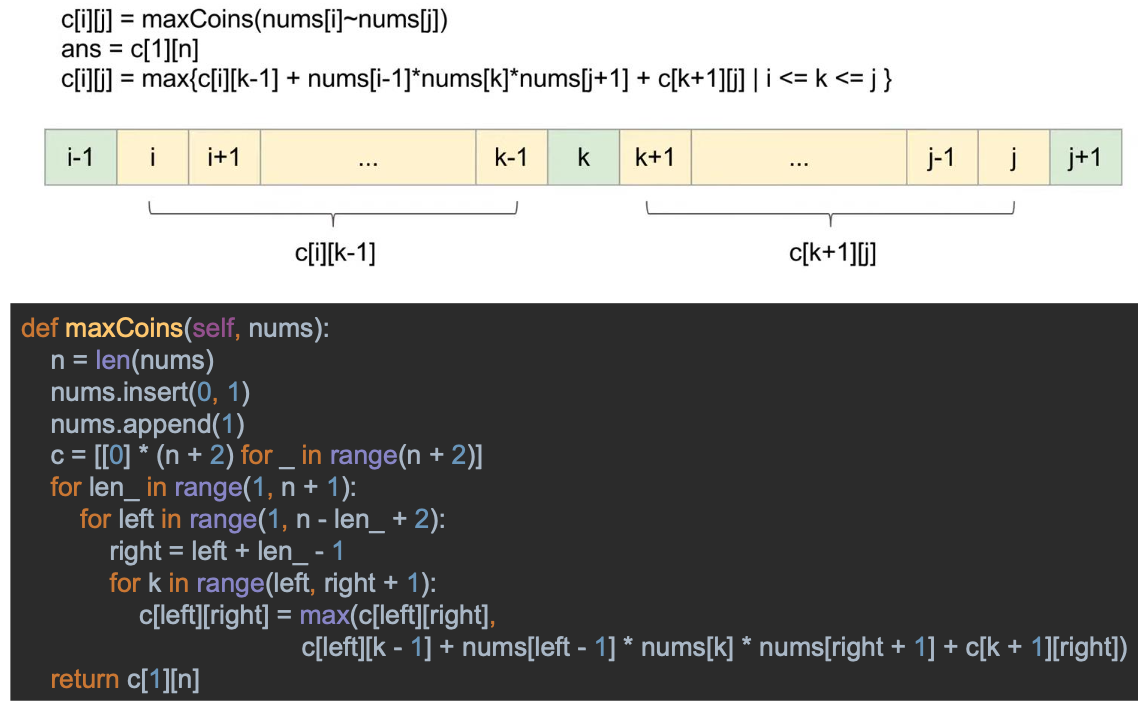

In [2]:
class Solution:
    def maxCoins(self, nums):
        if not nums: return 0
        if len(nums) == 1: return nums[0]
        nums = [1] + nums + [1]
        dp = [[0] * len(nums) for _ in range(len(nums))]
        for i in range(len(nums)-1, -1, -1): 
            for j in range(i+2, len(nums)):
                for k in range(i+1, j):
                    dp[i][j] = max(dp[i][j], dp[i][k]+dp[k][j]+nums[i]*nums[k]*nums[j])
        return dp[0][-1]

In [3]:
class Solution:
    def maxCoins(self, nums): 
        n = len(nums) 
        nums.insert(0, 1)
        nums.append(1)
        c = [[0] * (n + 2) for _ in range(n + 2)]
        for len_ in range(1, n + 1):
            for left in range(1, n - len_ + 2):
                right = left + len_ - 1
                for k in range(left, right + 1):
                    c[left][right] = max(c[left][right], c[left][k - 1] + nums[left - 1] * nums[k] * nums[right + 1] + c[k + 1][right])
        return c[1][n]

# 2. LeetCode 85. Maximal Rectangle 最大矩形

Given a rows x cols binary matrix filled with 0's and 1's, find the largest rectangle containing only 1's and return its area.

给定一个仅包含 0 和 1 、大小为 rows x cols 的二维二进制矩阵，找出只包含 1 的最大矩形，并返回其面积。

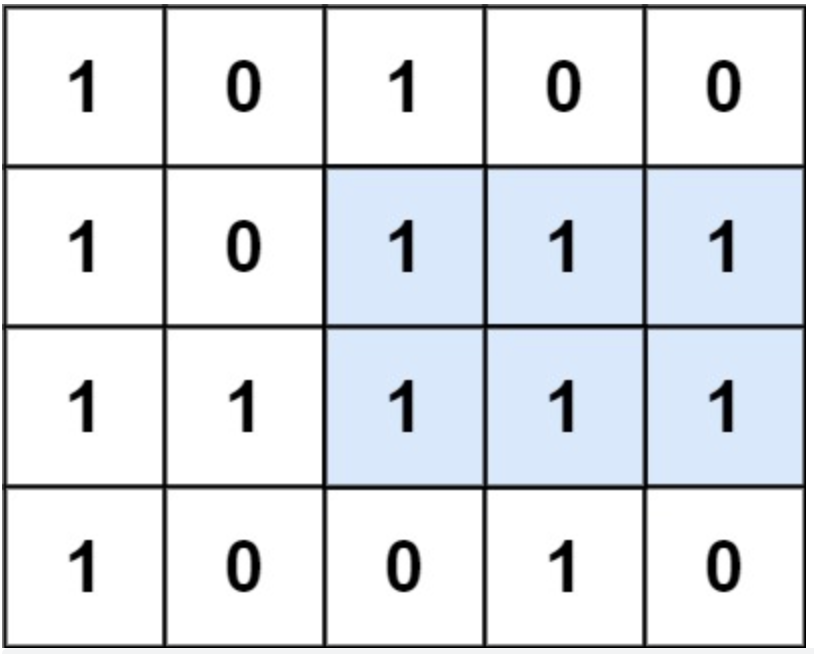

Example 1:

```
Input: matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
Output: 6
Explanation: The maximal rectangle is shown in the above picture.
```

最大矩形如上图所示。

Example 2:

```
Input: matrix = []
Output: 0
```

Example 3:

```
Input: matrix = [["0"]]
Output: 0
```

Example 4:

```
Input: matrix = [["1"]]
Output: 1
```

Example 5:

```
Input: matrix = [["0","0"]]
Output: 0
```

Constraints:

- rows == matrix.length

- cols == matrix[i].length

- 1 <= row, cols <= 200

- matrix[i][j] is '0' or '1'.



In [4]:
from typing import List
class Solution:
    def maximalRectangle(self, matrix: List[List[str]]) -> int:
        if not matrix or not matrix[0]:
            return 0
        nums = [int(''.join(row), base=2) for row in matrix] # 先将每一行变成2进制的数字
        ans, N = 0, len(nums)
        for i in range(N):# 遍历每一行，求以这一行为第一行的最大矩形
            j, num = i, nums[i]
            while j < N: # 依次与下面的行进行与运算。
                num = num & nums[j]  # num 中为1的部分，说明上下两行该位置都是1，相当于求矩形的高，高度为j-i+1
                # print('num=',bin(num))
                if not num: # 没有1说明没有涉及第i到第j行的竖直矩形
                    break
                width, curnum = 0, num
                while curnum: 
                    # 将cursum与自己右移一位进行&操作。如果有两个1在一起，那么cursum才为1，相当于求矩形宽度
                    width += 1
                    curnum = curnum & (curnum >> 1)
                    # print('curnum',bin(curnum))
                ans = max(ans, width * (j-i+1))
                # print('i','j','width',i,j,width)
                # print('ans=',ans)
                j += 1
        return ans

In [5]:
class Solution:
    def maximalRectangle(self, matrix) -> int:
        if len(matrix) == 0:
            return 0
        res = 0
        m, n = len(matrix), len(matrix[0])
        heights = [0] * n
        for i in range(m):
            for j in range(n):
                if matrix[i][j] == '0':
                    heights[j] = 0
                else:
                    heights[j] = heights[j] + 1
            res = max(res, self.largestRectangleArea(heights))
        return res

    def largestRectangleArea(self, heights):
        heights.append(0)
        stack = []
        res = 0
        for i in range(len(heights)):
            while stack and heights[i] < heights[stack[-1]]:
                s = stack.pop()
                res = max(res, heights[s] * ((i - stack[-1] - 1) if stack else i))
            stack.append(i)
        return res

In [6]:
# 哨兵优化的单调栈
class Solution:
    def MonotoneStack(self, heights: List[int]) -> int:
        # 哨兵优化的单调栈
        heights = heights + [-1]
        st = [-1]
        max_rec = 0
        for i in range(0, len(heights)):
            while heights[i] < heights[st[-1]]:
                cur = st.pop()
                max_rec = max(max_rec, (i - st[-1] - 1) * heights[cur])
            st.append(i)
        return max_rec

    def maximalRectangle(self, matrix: List[List[str]]) -> int:
        m = len(matrix)
        n = len(matrix[0])
        # 将 str 数组转化为 int 数组
        matrix = [[int(matrix[i][j]) for j in range(n)] for i in range(m)]
        # 记录每个坐标在竖直方向上的前缀和
        for i in range(1, m):
            for j in range(n):
                if matrix[i][j] == 1:
                    matrix[i][j]= matrix[i-1][j]+1
        # 对于每一行,分别调用“单调栈”算法解题
        rows = [self.MonotoneStack(matrix[i]) for i in range(m)]
        # 最后返回最大值
        return max(rows)

In [7]:
# 直观想法：
# 1. 从下标 0 的行开始往后逐行遍历。
# 2. 对于第 row 行，需要获得第j列的元素往上延伸的柱高度 heights[row][j]。
# 3. 对每行的heights[row]做和 LC 84 相同的操作，获得每行的最大 max_area，不断对 max_area 进行更新。
# heights[row][j]的更新：
# 1. 若 matrix[row][j]==‘1’：
# heights[row][j]=1 if row==0 else heights[row-1][j]
# 2. 若 matrix[row][j]==‘0’：
# heights[row][j]=0

def maximalRectangle(self, matrix):
    rows=len(matrix)
    cols=len(matrix[0])
    max_area=0
    heights=[[0]*(cols+2) for _ in range(rows)]

    for row in range(rows):
        stack=[]
        stack.append(0)
        dp=[1]*(cols+2)
        for i in range(1, cols+1):
            if matrix[row][i-1]=='1':
                heights[row][i]=1 if row==0 else heights[row-1][i]+1
            else:
                heights[row][i]=0
            # 当前元素大于栈内最后元素
            if heights[row][i]>=heights[row][stack[-1]]:
                stack.append(i)
            # 当前元素小于栈内最后元素,需要把栈内的元素 pop 出来
            else:
                while(heights[row][stack[-1]]>heights[row][i]):
                    item=stack.pop()
                    dp[item]=i-stack[-1]-1
                stack.append(i)
        if 0>=heights[row][stack[-1]]:
            stack.append(cols+1)
        else:
            while(heights[row][stack[-1]]>0):
                item=stack.pop()
                dp[item]=cols-stack[-1]
            stack.append(cols+1)
        for k in range(len(dp)):
            dp[k]=dp[k]*heights[row][k]
        max_area=max(max_area,max(dp))
    return max_area

# 3. LeetCode 84. Largest Rectangle in Histogram 柱状图中最大的矩形

Given an array of integers heights representing the histogram's bar height where the width of each bar is 1, return the area of the largest rectangle in the histogram.

给定 n 个非负整数，用来表示柱状图中各个柱子的高度。每个柱子彼此相邻，且宽度为 1 。

求在该柱状图中，能够勾勒出来的矩形的最大面积。

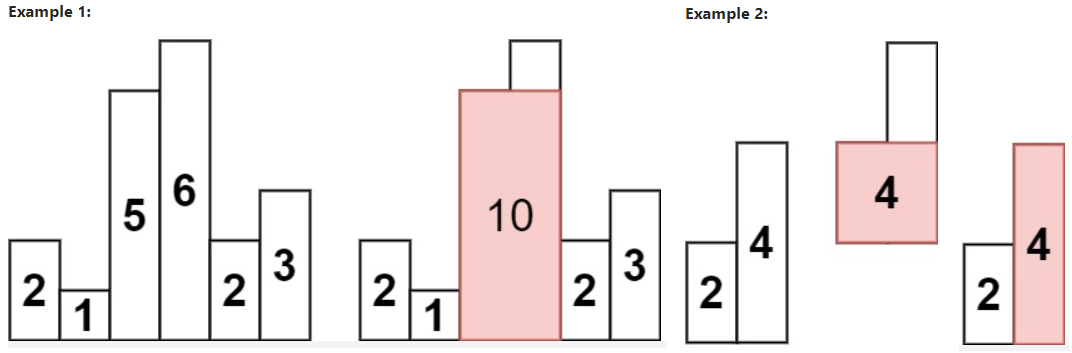

Example 1:

```
Input: heights = [2,1,5,6,2,3]
Output: 10
Explanation: The above is a histogram where width of each bar is 1.
The largest rectangle is shown in the red area, which has an area = 10 units.
```
最大的矩形为图中红色区域，面积为 10

Example 2:

```
Input: heights = [2,4]
Output: 4
```

Constraints:

- 1 <= heights.length <= $10^5$

- 0 <= heights[i] <= $10^4$

In [8]:
from typing import List
class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        stack = [-1]
        heights.append(0)
        n,ans = len(heights),0
        for i in range(n):
            while len(stack) > 1 and heights[stack[-1]] > heights[i]:
                p = stack.pop()
                l,r = stack[-1],i
                ans = max(ans,heights[p] * (r - l - 1))            
            stack.append(i)
        return ans

In [9]:
class Solution(object):
    def largestRectangleArea(self, heights):
        # 定义一个栈 stack
        stack = []
        # 添加两个哨兵
        # 在 heights 的前方和后方设置哨兵节点
        heights.insert(0,0)
        heights.append(0)
        dp=[1]*len(heights)
        stack.append()
        for i in range(1, len(heights)):
            # 当前元素大于栈內最后元素
            if heights [i]>=heights[stack[-1]]:
                stack.append(i)
            # 当前元素小于栈内最后元素,需要把楼内的元素 pop 出来
            else:
                while(heights[stack[-1]]>heights[1]):
                    item=stack.pop()
                    dp[item]=i-stack[-1]-1
                stack.append(i)
        # dp=dp[1:-1]
        for j in range(len(dp)):
            dp[j]=dp[j]*heights[j]
        return max(dp)

# 4. LeetCode 152. Maximum Product Subarray 乘积最大子数组

Given an integer array nums, find a contiguous non-empty subarray within the array that has the largest product, and return the product.

The test cases are generated so that the answer will fit in a 32-bit integer.

A subarray is a contiguous subsequence of the array.

给你一个整数数组 nums ，请你找出数组中乘积最大的非空连续子数组（该子数组中至少包含一个数字），并返回该子数组所对应的乘积。

测试用例的答案是一个 32-位 整数。

子数组 是数组的连续子序列。


Example 1:

```
Input: nums = [2,3,-2,4]
Output: 6
Explanation: [2,3] has the largest product 6.
```

子数组 [2,3] 有最大乘积 6。

Example 2:

```
Input: nums = [-2,0,-1]
Output: 0
Explanation: The result cannot be 2, because [-2,-1] is not a subarray.
```

结果不能为 2, 因为 [-2,-1] 不是子数组。

Constraints:

- $1 <= nums.length <= 2 * 10^{4}$

- -10 <= nums[i] <= 10

- The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

nums 的任何前缀或后缀的乘积都 保证 是一个 32-位 整数


## 解题思路

1. 给定一个整数数组 nums ，找出一个序列中乘积最大的连续子序列（该序列至少包含一个数）。

2. 给出一个数组，要求找出这个数组中连续元素乘积最大的值。

3. 这一题是 DP 的题，状态转移方程是：最大值是 Max(f(n)) = Max( Max(f(n-1)) * n, Min(f(n-1)) * n)；最小值是 Min(f(n)) = Min( Max(f(n-1)) * n, Min(f(n-1)) * n)。只要动态维护这两个值，如果最后一个数是负数，最大值就在负数 * 最小值中产生，如果最后一个数是正数，最大值就在正数 * 最大值中产生。

In [10]:
class Solution:
    def maxProduct(self, A):
        B = A[::-1]
        for i in range(1, len(A)):
            A[i] *= A[i - 1] or 1
            B[i] *= B[i - 1] or 1
        return max(max(A),max(B)) 

In [11]:
from typing import List
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        dpMax = copy.copy(nums)
        dpMin = copy.copy (nums)
        for i in range(1, len(nums)):
            dpMax[i] = max(dpMax[i-1] * nums[i],nums[i],dpMin[i-1] *nums[i])
            dpMin[i]=min(dpMax[i-1]* nums[i],nums[i],dpMin[i-1] *nums[i])
        return max(dpMax)

In [12]:
from typing import List
class Solution:
    def maxproduct(self, nums: List[int]) -> int:
        Max_pre = nums[0]
        Min_pre = nums[0]
        ans = nums [0]
        for i in range(1, len(nums)):
            Max_cur = max(Max_pre * nums[i], nums[i], Min_pre * nums[i])
            Min_cur = min(Max_pre * nums[i], nums[i], Min_pre * nums[i])
            Max_pre, Min_pre = Max_cur, Min_cur
            ans = max(ans, Max_cur)
        return ans

# 5. 樹

- 要理解树数据结构的含义以及如何使用。

- 使用列表实现树。

- 使用类和引用来实现树。

- 实现树作为递归数据结构。

- 使用堆实现优先级队列。

## 實例

- 文件系统树

- 网页

- 句子

- 公式解析

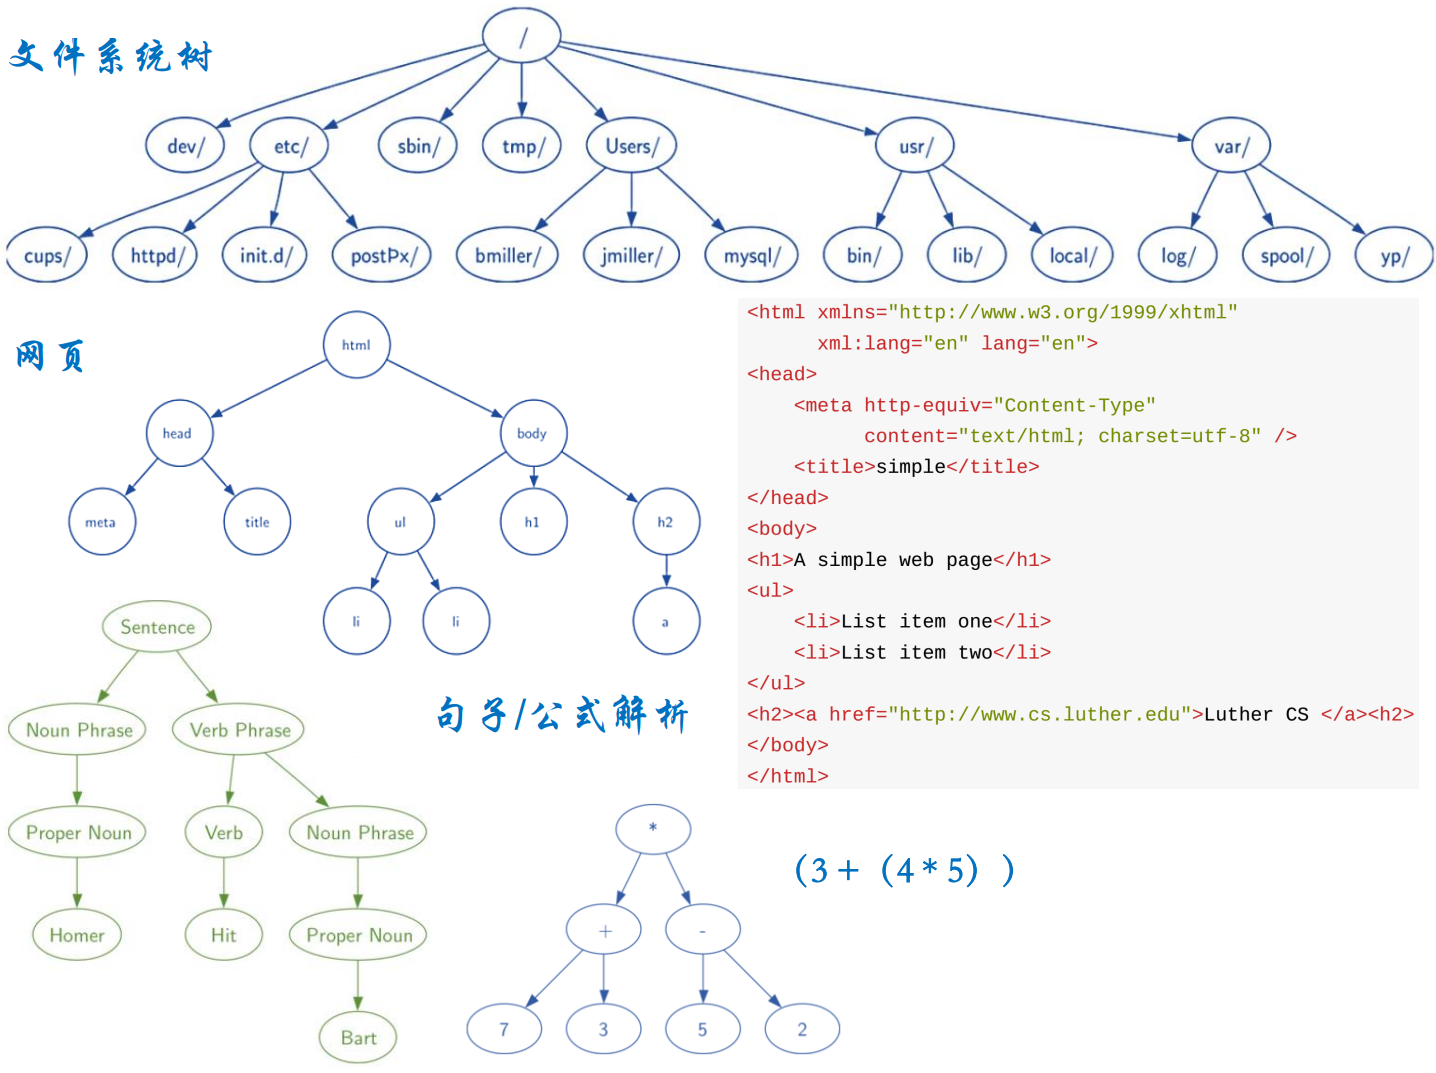

# 6. 樹各名詞定義

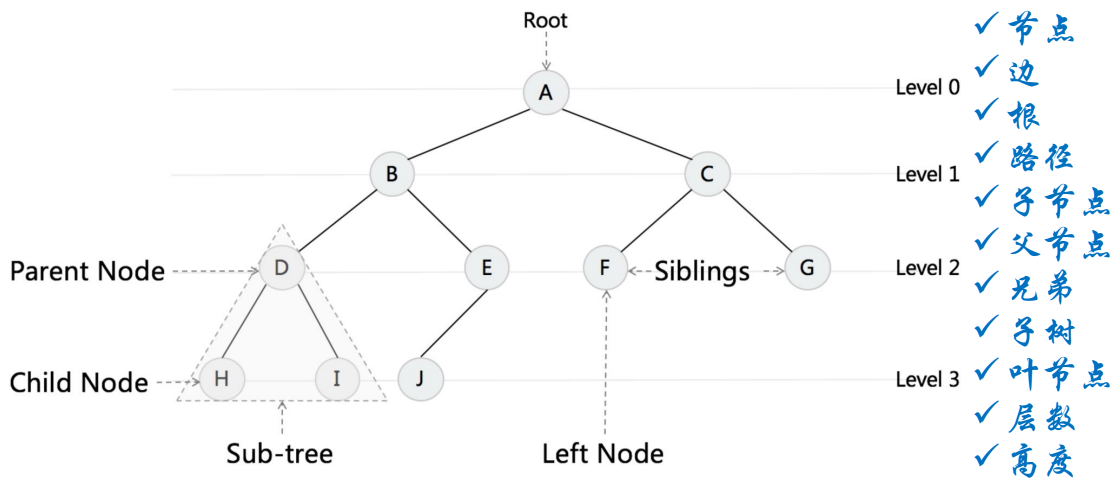

# 7. 定义树（Tree）

定义一：树由一组节点和一组连接节点的边组成。且树具有以下属性：

- 树的一个节点被指定为根节点
- 除了根节点之外，每个节点 n 通过一个其他节点 p 的边连接，其中 p 是 n 的父节点
- 从根路径遍历到每个节点路径唯一
- 如果树中的每个节点最多有两个子节点，我们说该树是一个二叉树

定义二：树是空的，或者由一个根节点和零个或多个子树组成，每个子树也是一棵树。每个子树的根节点通过边连接到父树的根节点。

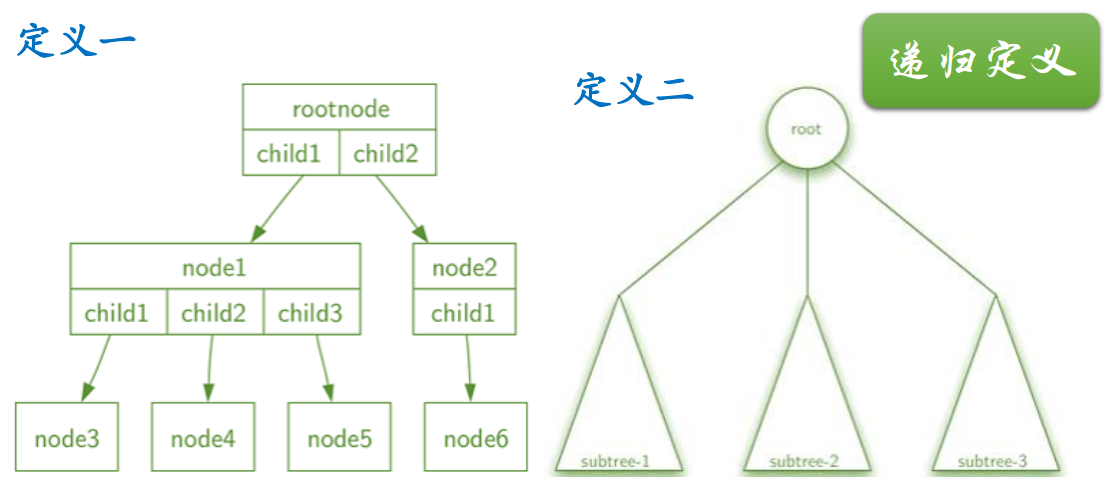

# 8. Know Thy Complexities!

## Reference

https://www.bigocheatsheet.com/

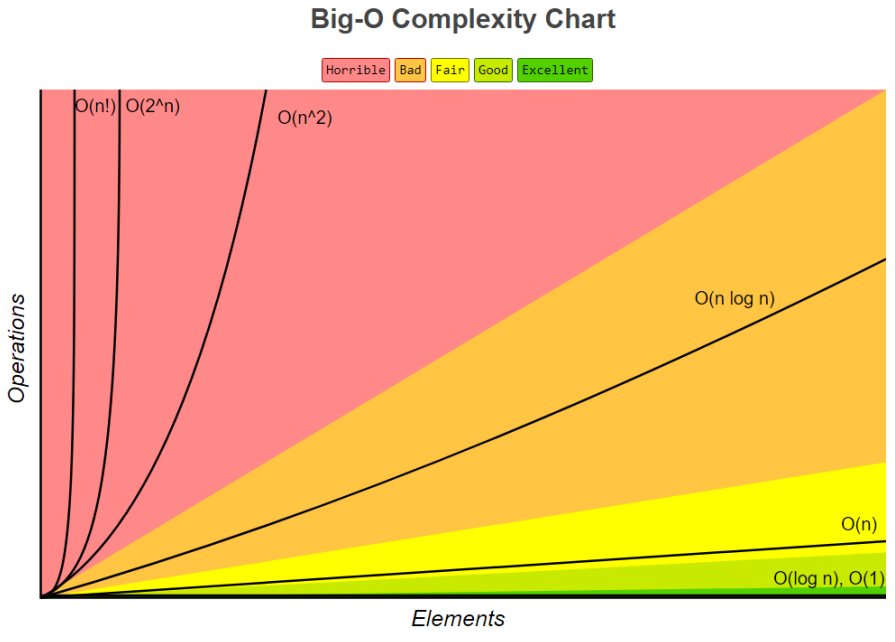

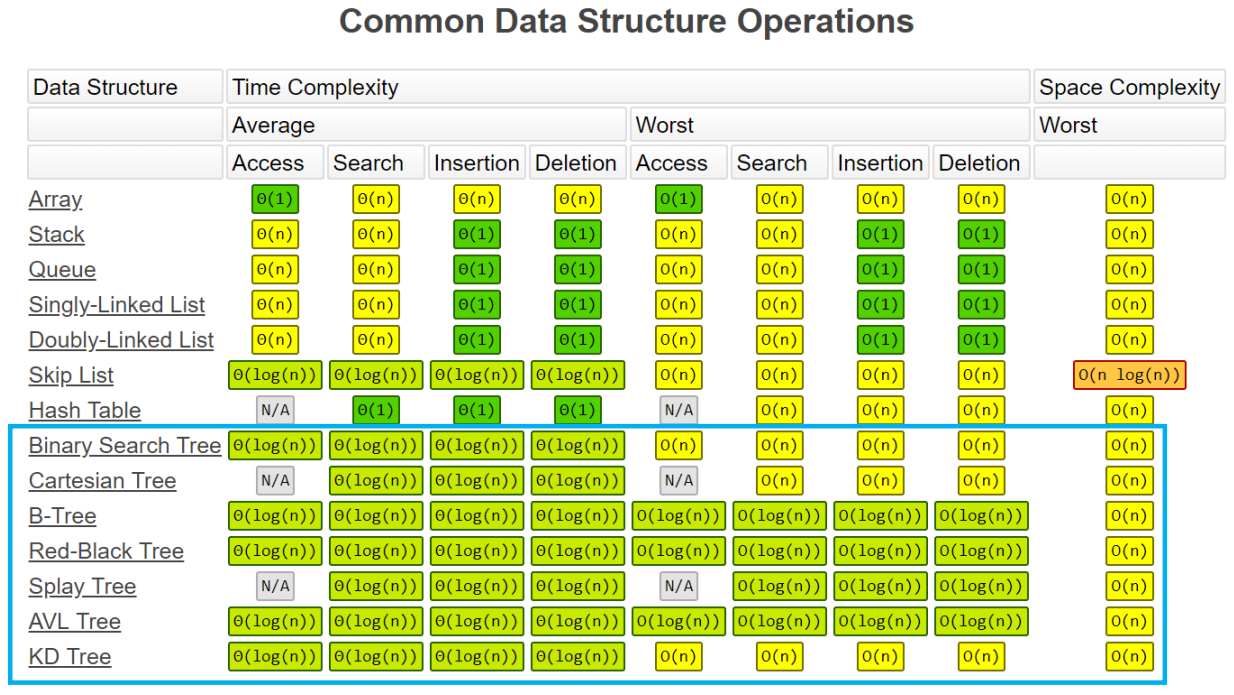

# 9. Binary Tree & Binary Search Tree

- Binary Tree : 基于二叉堆实现优先队列
    
- Binary Search Tree : 二叉查找树

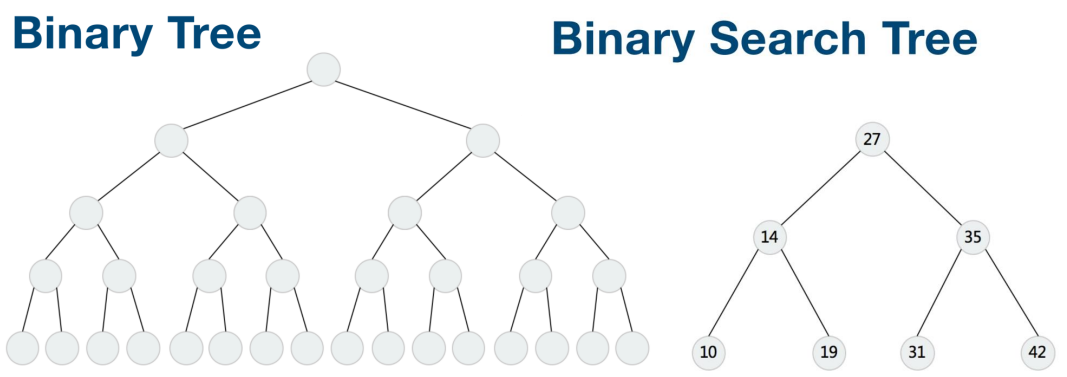

# 10. 树的表示-列表

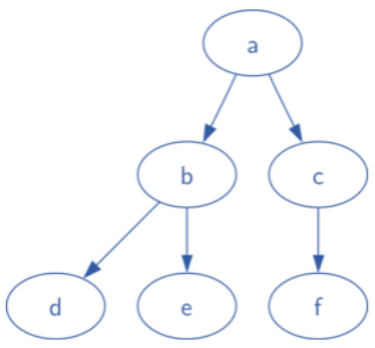
```
myTree = ['a', #root
    ['b', #left subtree
        ['d', [], []],
        ['e', [], []] ],
    ['c', #right subtree
        ['f', [], []],
        [] ]
    ]

print(myTree)
print('left subtree = ', myTree[1])
print('root = ', myTree[0])
print('right subtree = ', myTree[2])
```

In [13]:
myTree = ['a', #root
    ['b', #left subtree
        ['d', [], []],
        ['e', [], []] ],
    ['c', #right subtree
        ['f', [], []],
        [] ]
    ]

print(myTree)
print('left subtree = ', myTree[1])
print('root = ', myTree[0])
print('right subtree = ', myTree[2])

['a', ['b', ['d', [], []], ['e', [], []]], ['c', ['f', [], []], []]]
left subtree =  ['b', ['d', [], []], ['e', [], []]]
root =  a
right subtree =  ['c', ['f', [], []], []]


# 11. 树的表示-列表

In [14]:
def BinaryTree(r):
    return [r, [], []]

def insertLeft(root,newBranch):
    t = root.pop(1)
    if len(t) > 1:
        root.insert(1,[newBranch,t,[]])
    else:
        root.insert(1,[newBranch, [], []])
    return root

def insertRight(root,newBranch):
    t = root.pop(2)
    if len(t) > 1:
        root.insert(2,[newBranch,[],t])
    else:
        root.insert(2,[newBranch,[],[]])
    return root

def getRootVal(root):
    return root[0]

def setRootVal(root,newVal):
    root[0] = newVal

def getLeftChild(root):
    return root[1]

def getRightChild(root):
    return root[2]

r = BinaryTree(3)
insertLeft(r,4)
insertLeft(r,5)
insertRight(r,6)
insertRight(r,7)
l = getLeftChild(r)
print(l)
setRootVal(l,9)
print(r)
insertLeft(l,11)
print(r)
print(getRightChild(getRightChild(r)))

[5, [4, [], []], []]
[3, [9, [4, [], []], []], [7, [], [6, [], []]]]
[3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]]
[6, [], []]


# 12. 树的表示-类
```
class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None
    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t
    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t
    def getRightChild(self):
        return self.rightChild
    def getLeftChild(self):
        return self.leftChild
    def setRootVal(self,obj):
        self.key = obj
    def getRootVal(self):
        return self.key
```

In [15]:
class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None
    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t
    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t
    def getRightChild(self):
        return self.rightChild
    def getLeftChild(self):
        return self.leftChild
    def setRootVal(self,obj):
        self.key = obj
    def getRootVal(self):
        return self.key

r = BinaryTree('a')
print(r.getRootVal())
print(r.getLeftChild())
r.insertLeft('b')
print(r.getLeftChild())
print(r.getLeftChild().getRootVal())
r.insertRight('c')
print(r.getRightChild())
print(r.getRightChild().getRootVal())
r.getRightChild().setRootVal('hello')
print(r.getRightChild().getRootVal())

a
None
b
c
hello


# 13. 树和链表

In [16]:
class Node:
    def __init__(self, initdata):
        self.data = initdata
        self.next = None
    def getData(self):
        return self.data
    def getNext(self):
        return self.next
    def setData(self,newdata):
        self.data = newdata
    def setNext(self,newnext):
        self.next = newnext

class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None
    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t
    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t


# 14. LeetCode 100. Same Tree 相同的树

Given the roots of two binary trees p and q, write a function to check if they are the same or not.

Two binary trees are considered the same if they are structurally identical, and the nodes have the same value.


给你两棵二叉树的根节点 p 和 q ，编写一个函数来检验这两棵树是否相同。

如果两个树在结构上相同，并且节点具有相同的值，则认为它们是相同的。

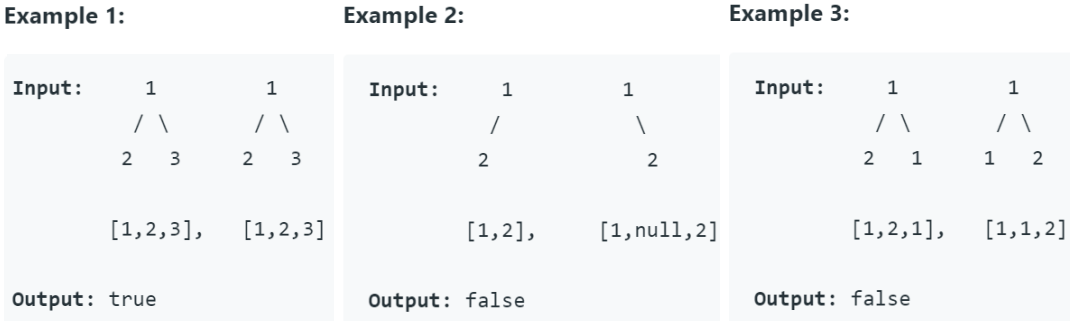

Example 1:

```
Input: p = [1,2,3], q = [1,2,3]
Output: true
```


Example 2:

```
Input: p = [1,2], q = [1,null,2]
Output: false
```

Example 3:

```
Input: p = [1,2,1], q = [1,1,2]
Output: false
```


Constraints:

- The number of nodes in both trees is in the range [0, 100].(两棵树上的节点数目都在范围 [0, 100] 内)

- -$10^4 <= Node.val <= 10^4$



In [17]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    # def isSameTree(self, p: TreeNode, q: TreeNode) -> bool:
    def isSameTree(self, p, q):
        if not p and not q:
            return True
        elif p is not None and q is not None:
            if p.val == q.val:
                return self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right)
            else:
                return False
        else:
            return False

## 說明
```
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
class Solution(object):
    def isSameTree(self, p, q):
        # ... Code ...
        return False or True
if __name__ == "__main__":
    root1, root1.left, root1.right = TreeNode(1), TreeNode(2), TreeNode(3)
    root2, root2.left, root2.right = TreeNode(1), TreeNode(2), TreeNode(3)
    print(Solution().isSameTree(root1, root2))
```

In [18]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
class Solution(object):
    def isSameTree(self, p, q):
        if p is None and q is None:
            return True
        if p is not None and q is not None:
            return p.val == q.val and self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right)
        return False
if __name__ == "__main__":
    root1, root1.left, root1.right = TreeNode(1), TreeNode(2), TreeNode(3)
    root2, root2.left, root2.right = TreeNode(1), TreeNode(2), TreeNode(3)
    print(Solution().isSameTree(root1, root2))

True


# 15. LeetCode 112. Path Sum 路径总和

Given the root of a binary tree and an integer targetSum, return true if the tree has a root-to-leaf path such that adding up all the values along the path equals targetSum.

A leaf is a node with no children.

给你二叉树的根节点 root 和一个表示目标和的整数 targetSum 。判断该树中是否存在 根节点到叶子节点 的路径，这条路径上所有节点值相加等于目标和 targetSum 。如果存在，返回 true ；否则，返回 false 。

叶子节点 是指没有子节点的节点。


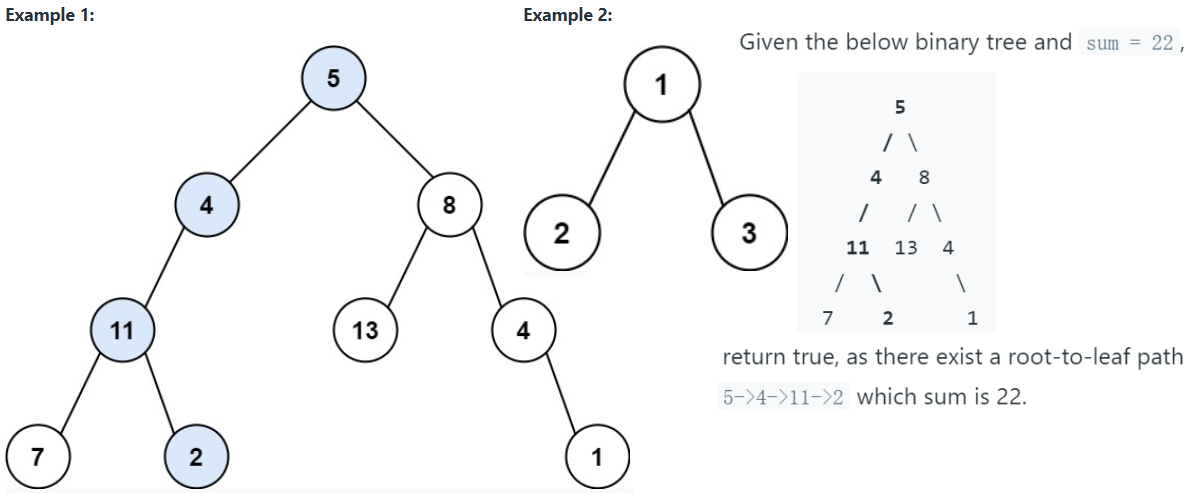

Example 1:

```
Input: root = [5,4,8,11,null,13,4,7,2,null,null,null,1], targetSum = 22
Output: true
Explanation: The root-to-leaf path with the target sum is shown.
```

解释：等于目标和的根节点到叶节点路径如上图所示。


Example 2:

```
Input: root = [1,2,3], targetSum = 5
Output: false
Explanation: There two root-to-leaf paths in the tree:
(1 --> 2): The sum is 3.
(1 --> 3): The sum is 4.
There is no root-to-leaf path with sum = 5.
```

解释：树中存在两条根节点到叶子节点的路径：
(1 --> 2): 和为 3
(1 --> 3): 和为 4
不存在 sum = 5 的根节点到叶子节点的路径。


Example 3:

```
Input: root = [], targetSum = 0
Output: false
Explanation: Since the tree is empty, there are no root-to-leaf paths.
```

解释：由于树是空的，所以不存在根节点到叶子节点的路径。

Constraints:

- The number of nodes in the tree is in the range [0, 5000].

树中节点的数目在范围 [0, 5000] 内

- -1000 <= Node.val <= 1000

- -1000 <= targetSum <= 1000


In [19]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def hasPathSum(self, root: TreeNode, targetSum: int) -> bool:
        if not root: return False
        res = []
        def pathval(root, path):
            path = path.copy()
            if not (root.left or root.right): 
                res.append(path)
                return
            if root.left:
                path.append(root.left.val)
                pathval(root.left, path)
                path.pop()
            if root.right:
                path.append(root.right.val)
                pathval(root.right, path)
                path.pop()
        pathval(root, [root.val])
        for path in res: 
            if sum(path) == targetSum: return True
        return False

## 說明
```
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
class Solution:
    def hasPathSum(self, root, sum)
        # ... Code ...
        return True or False
if __name__ == '__main__':
    root = TreeNode(5)
    root.left = TreeNode(4)
    root.right = TreeNode(8)
    root.right.left = TreeNode(13)
    root.right.right = TreeNode(4)
    root.right.right.right = TreeNode(1)
    root.left.left = TreeNode(11)
    root.left.left.left = TreeNode(7)
    root.left.left.right = TreeNode(2)
    print(Solution().hasPathSum(root, 22))
```

In [20]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def hasPathSum(self, root, sum):
        if not root:
            return False
        if not root.left and not root.right and root.val == sum:
            return True
        sum -= root.val
        return self.hasPathSum(root.left, sum) or self.hasPathSum(root.right, sum)

if __name__ == '__main__':
    root = TreeNode(5)
    root.left = TreeNode(4)
    root.right = TreeNode(8)
    root.right.left = TreeNode(13)
    root.right.right = TreeNode(4)
    root.right.right.right = TreeNode(1)
    root.left.left = TreeNode(11)
    root.left.left.left = TreeNode(7)
    root.left.left.right = TreeNode(2)
    print(Solution().hasPathSum(root, 22))

True


# 16. LeetCode 226. Invert Binary Tree 翻转二叉树

Given the root of a binary tree, invert the tree, and return its root.

给你一棵二叉树的根节点 root ，翻转这棵二叉树，并返回其根节点。

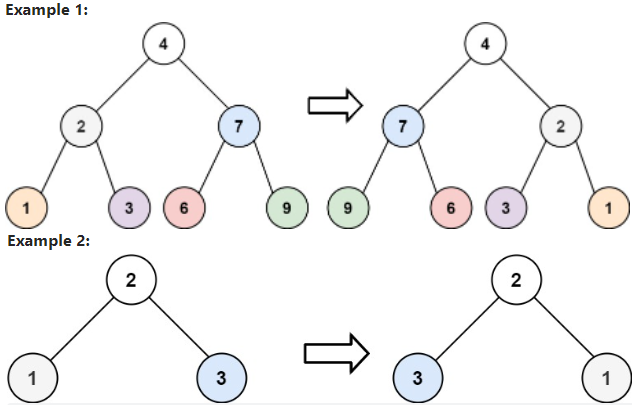

Example 1:

```
Input: root = [4,2,7,1,3,6,9]
Output: [4,7,2,9,6,3,1]
```


Example 2:

```
Input: root = [2,1,3]
Output: [2,3,1]
```


Example 3:

```
Input: root = []
Output: []
```

Constraints:

- The number of nodes in the tree is in the range [0, 100].

树中节点数目范围在 [0, 100] 内

- -100 <= Node.val <= 100




In [21]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def invertTree(self, root: TreeNode) -> TreeNode:
        self.spyxfamily(root)
        return root
    def spyxfamily(self,root):
        if root is  None:
            return
        root.left,root.right=root.right,root.left
        self.spyxfamily(root.left)
        self.spyxfamily(root.right)

In [22]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = No
class Solution(object):
    def invertTree(self, root):
        if root:
            root.left, root.right = self.invertTree(root.right), self.invertTree(root.left)
            return root

# 17. 树的遍历(Traversal)

- 1. 前序(Pre-order)：根-左-右

- 2. 中序(In-order)：左-根-右

- 3. 后序(Post-order)：左-右-根

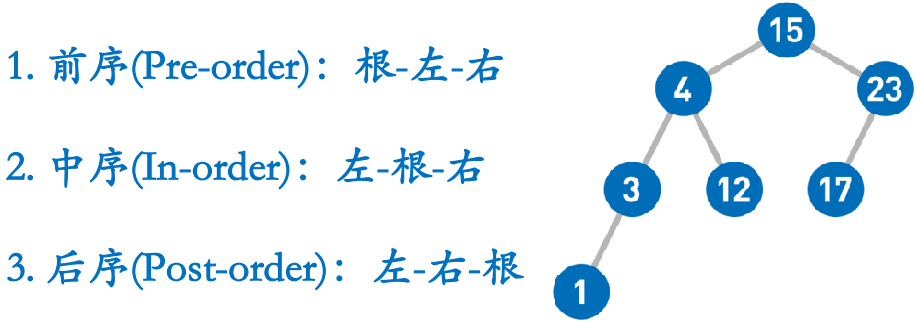

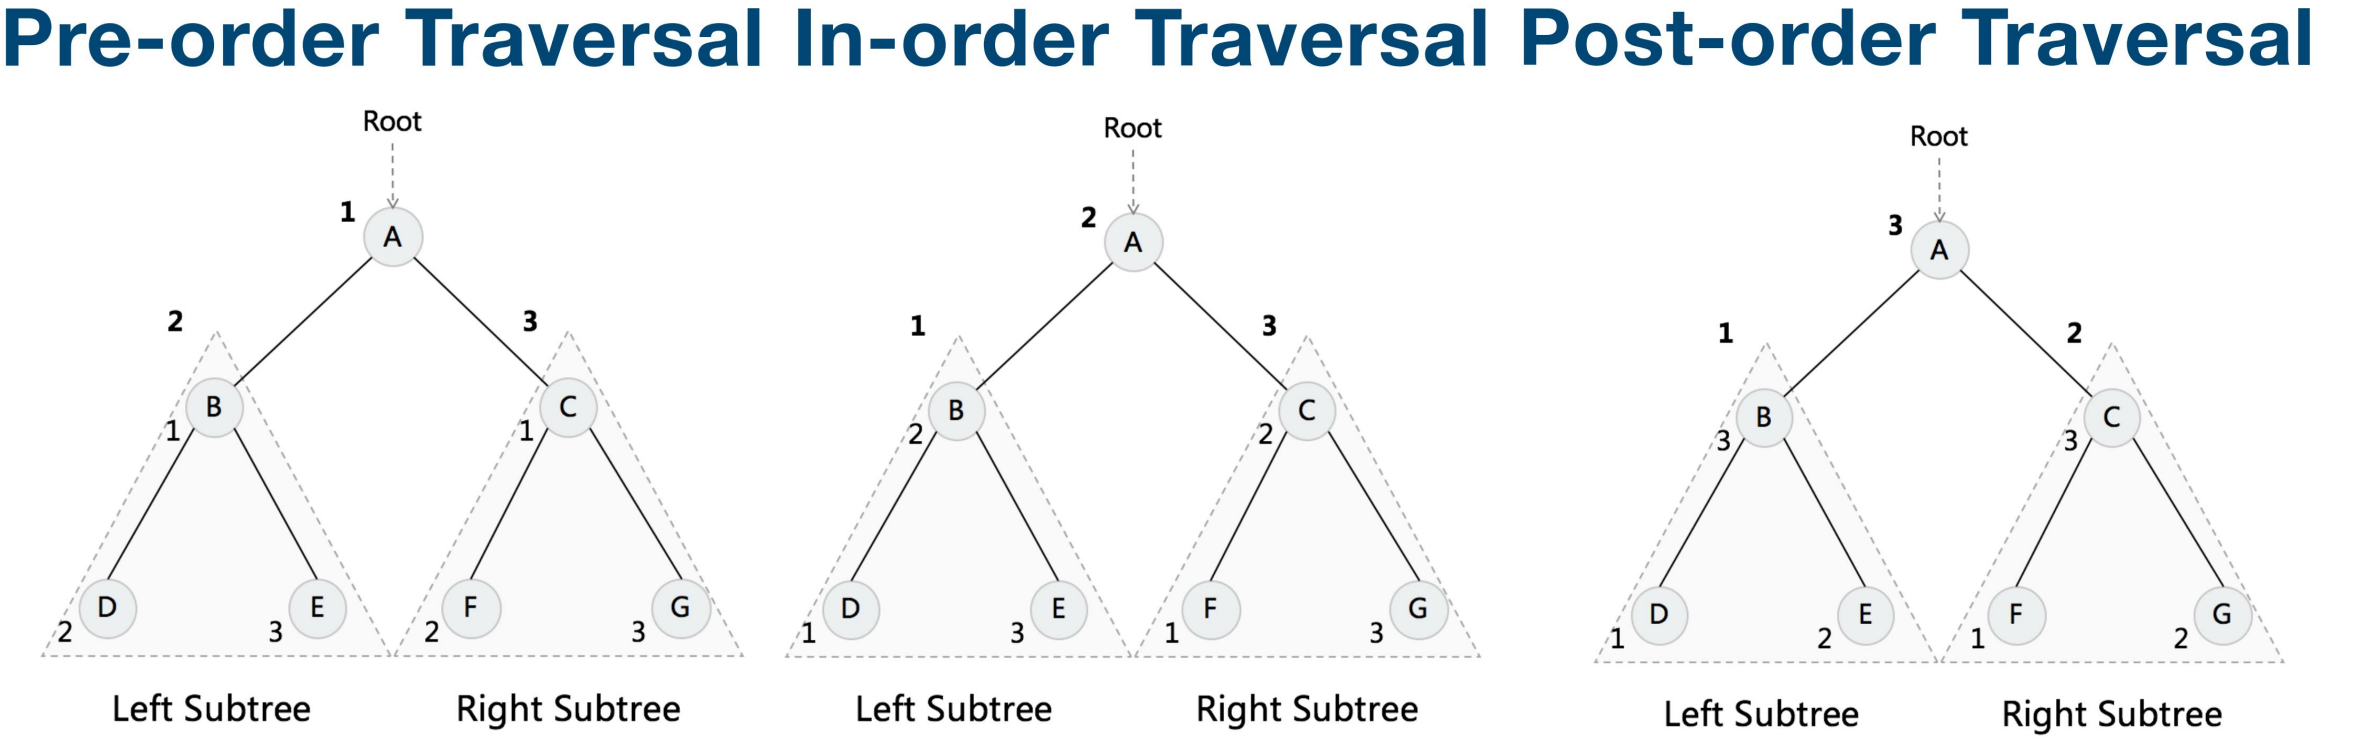

In [23]:
# 树的遍历

def preorder(tree):
    if tree:
        print(tree.getRootVal())
        preorder(tree.getLeftChild())
        preorder(tree.getRightChild())

def postorder(tree):
    if tree != None:
        postorder(tree.getLeftChild())
        postorder(tree.getRightChild())
        print(tree.getRootVal())

def inorder(tree):
    if tree != None:
        inorder(tree.getLeftChild())
        print(tree.getRootVal())
        inorder(tree.getRightChild())

# 18. LeetCode 144. Binary Tree Preorder Traversal 二叉树的前序遍历

Given the root of a binary tree, return the preorder traversal of its nodes' values.

给你二叉树的根节点 root ，返回它节点值的 前序 遍历。

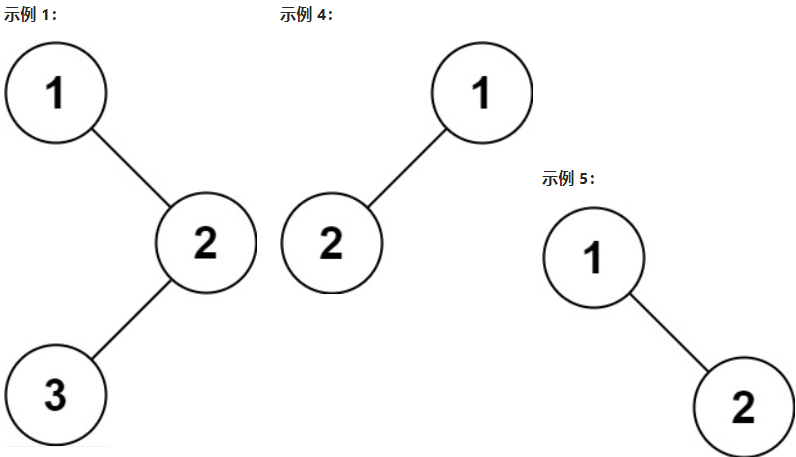

Example 1:

```
Input: root = [1,null,2,3]
Output: [1,2,3]
```


Example 2:

```
Input: root = []
Output: []
```


Example 3:

```
Input: root = [1]
Output: [1]
```

Example 4:

```
输入：root = [1,2]
输出：[1,2]
```

Example 5:

```
输入：root = [1,null,2]
输出：[1,2]
```

Constraints:

- The number of nodes in the tree is in the range [0, 100].

树中节点数目范围在 [0, 100] 内

- -100 <= Node.val <= 100


Follow up: Recursive solution is trivial, could you do it iteratively?

进阶：递归算法很简单，你可以通过迭代算法完成吗？

In [24]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
# Python 迭代
class Solution(object):
    def preorderTraversal(self, root):
        if not root:
            return []
        
        stack = [root]
        res = []
        while stack:
            cur = stack.pop()
            res.append(cur.val)            
            if cur.right:
                stack.append(cur.right)
            if cur.left:
                stack.append(cur.left)
        return res

# Python 递归
class Solution(object):
    def preorderTraversal(self, root):
        if not root:
            return []
        return [root.val] + self.preorderTraversal(root.left) + self.preorderTraversal(root.right)

## 說明

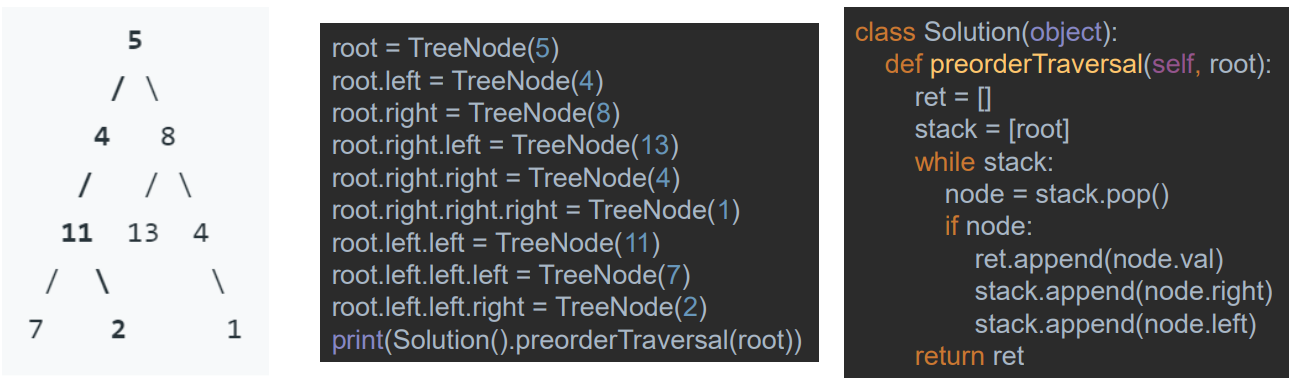

In [25]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution(object):
    def preorderTraversal(self, root):
        ret = []
        stack = [root]
        while stack:
            node = stack.pop()
            if node:
                ret.append(node.val)
                stack.append(node.right)
                stack.append(node.left)
        return ret

root = TreeNode(5)
root.left = TreeNode(4)
root.right = TreeNode(8)
root.right.left = TreeNode(13)
root.right.right = TreeNode(4)
root.right.right.right = TreeNode(1)
root.left.left = TreeNode(11)
root.left.left.left = TreeNode(7)
root.left.left.right = TreeNode(2)
print(Solution().preorderTraversal(root))

[5, 4, 11, 7, 2, 8, 13, 4, 1]


# 19. 分析树 (Parse Tree)

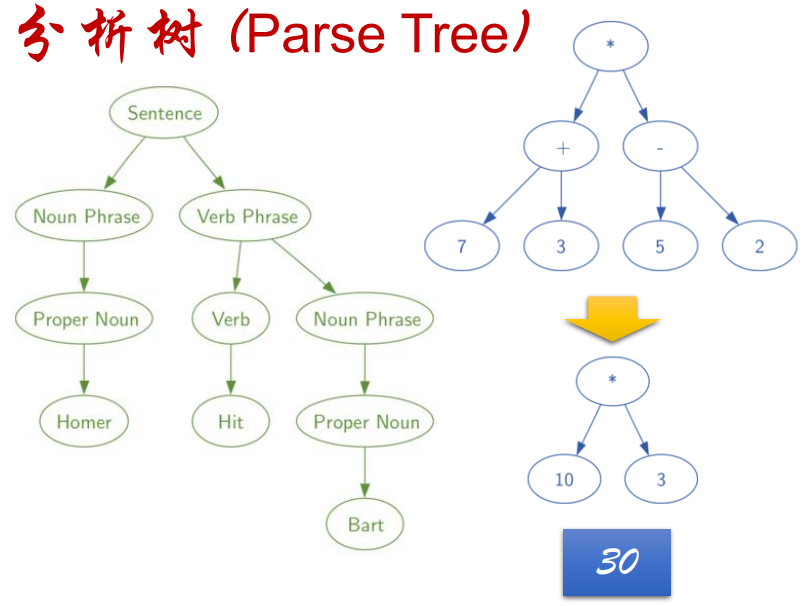

## 构建分析树： （3 +（4 * 5））

四种不同的符号要考虑：左括号，右括号，运算符和操作数


## 定义四个规则如下：

1. 如果当前符号是 '('，添加一个新节点作为当前节点的左子节点，并下降到左子节点。

2. 如果当前符号在列表 ['+'，' - '，'/'，'*'] 中，请将当前节点的根值设置为由当前符号表示的运算符。 添加一个新节点作为当前节点的右子节点，并下降到右子节点。

3. 如果当前符号是数字，请将当前节点的根值设置为该数字并返回到父节点。

4. 如果当前符号是 ')'，则转到当前节点的父节点。

# 20. 分析树 (Parse Tree)流程

## 构建分析树

```
['('，'3'，'+'，'('，'4'，'*'，'5'，')'，')']
```

1. 创建一个空树。

2. 读取 ( 作为第一个标记。按规则1，创建一个新节点作为根的左子节点。使当前节点到这个新子节点。

3. 读取 3 作为下一个符号。按照规则3，将当前节点的根值设置为3，使当前节点返回到父节点。

4. 读取 + 作为下一个符号。根据规则2，将当前节点的根值设置为+，并添加一个新节点作为右子节点。新的右子节点成为当前节点。

5. 读取 ( 作为下一个符号，按规则1，创建一个新节点作为当前节点的左子节点，新的左子节点成为当前节点。

6. 读取 4 作为下一个符号。根据规则3，将当前节点的值设置为 4。使当前节点返回到父节点。
7. 读取 * 作为下一个符号。根据规则2，将当前节点的根值设置为 *，并创建一个新的右子节点。新的右子节点成为当前节点。

8. 读取 5 作为下一个符号。根据规则3，将当前节点的根值设置为5。使当前节点返回到父节点。

9. 读取 ) 作为下一个符号。根据规则4，当前节点返回到父节点。

10. 读取 ) 作为下一个符号。根据规则4，当前节点返回到父节点 + 。没有+的父节点，完成创建。


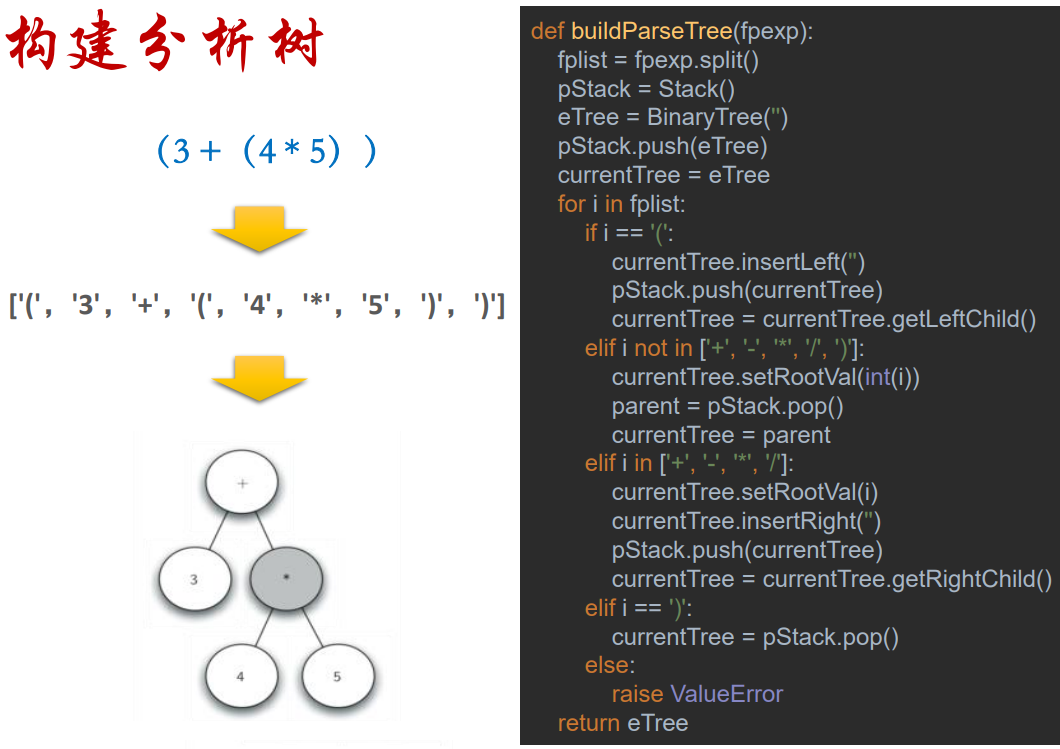

In [26]:
def buildParseTree(fpexp):
    fplist = fpexp.split()
    pStack = Stack()
    eTree = BinaryTree('')
    pStack.push(eTree)
    currentTree = eTree
    for i in fplist:
        if i == '(':
            currentTree.insertLeft('')
            pStack.push(currentTree)
            currentTree = currentTree.getLeftChild()
        elif i not in ['+', '-', '*', '/', ')']:
            currentTree.setRootVal(int(i))
            parent = pStack.pop()
            currentTree = parent
        elif i in ['+', '-', '*', '/']:
            currentTree.setRootVal(i)
            currentTree.insertRight('')
            pStack.push(currentTree)
            currentTree = currentTree.getRightChild()
        elif i == ')':
            currentTree = pStack.pop()
        else:
            raise ValueError
    return eTree

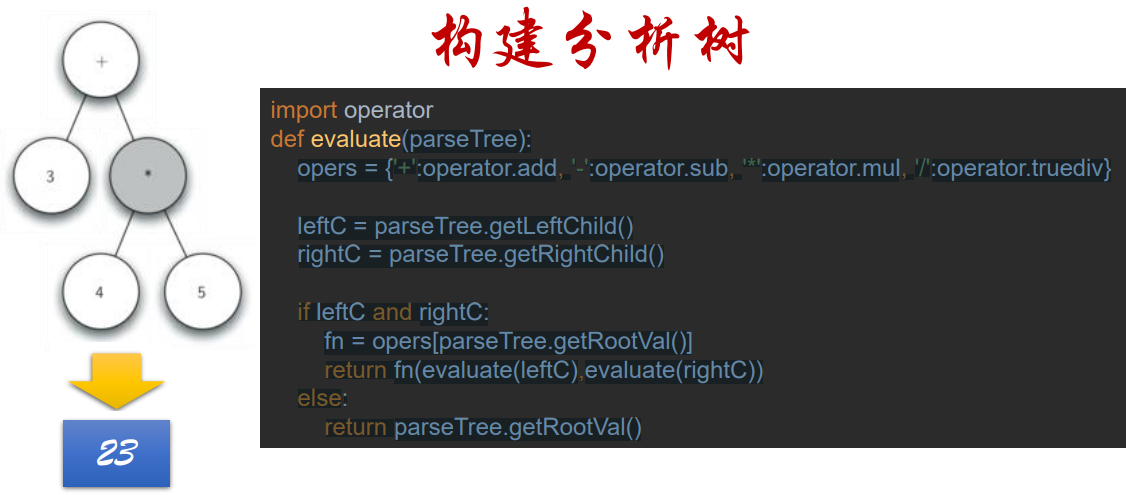

In [27]:
import operator
def evaluate(parseTree):
    opers = {'+':operator.add, '-':operator.sub, '*':operator.mul, '/':operator.truediv}
    leftC = parseTree.getLeftChild()
    rightC = parseTree.getRightChild()
    if leftC and rightC:
        fn = opers[parseTree.getRootVal()]
        return fn(evaluate(leftC),evaluate(rightC))
    else:
        return parseTree.getRootVal()